Step 1: Load and Prepare data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe
print(df.head())


  Faculty Name Course Code          Course Name  Category Academic Year  Score
0        Priya      CS7070     Machine Learning  Teaching     2023-2024     10
1        Nisha      EC9090  Signals and Systems  Teaching     2023-2024      9
2        Sonia      EE4040  Digital Electronics  Teaching     2023-2024      9
3        Pooja      CS2004   Python Programming  Teaching     2022-2023     10
4          Raj      PH3303     Electromagnetism  Research     2023-2024     10


Step 2: Exploratory Data Analysis

In [2]:
# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check the data types
print(df.dtypes)

# Summary of categorical data
print(df['Category'].value_counts())
print(df['Academic Year'].value_counts())


           Score
count  44.000000
mean    8.818182
std     0.921897
min     7.000000
25%     8.000000
50%     9.000000
75%    10.000000
max    10.000000
Faculty Name     0
Course Code      0
Course Name      0
Category         0
Academic Year    0
Score            0
dtype: int64
Faculty Name     object
Course Code      object
Course Name      object
Category         object
Academic Year    object
Score             int64
dtype: object
Category
Teaching          27
Research           8
Administrative     5
Consultancy        4
Name: count, dtype: int64
Academic Year
2023-2024    42
2022-2023     2
Name: count, dtype: int64


Step 3: Data Visualization

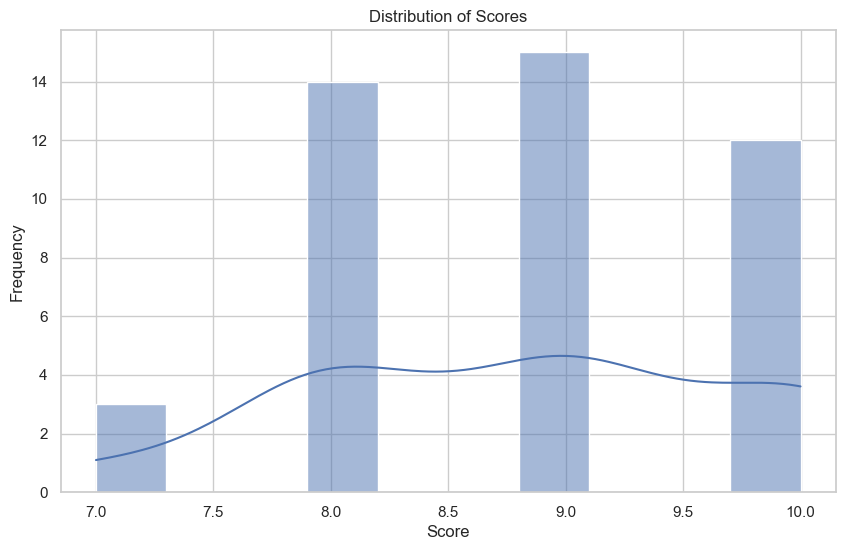

C:\Users\deepi\AppData\Local\Temp\ipykernel_17700\3779824612.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Score', data=df, ci=None, estimator='mean')


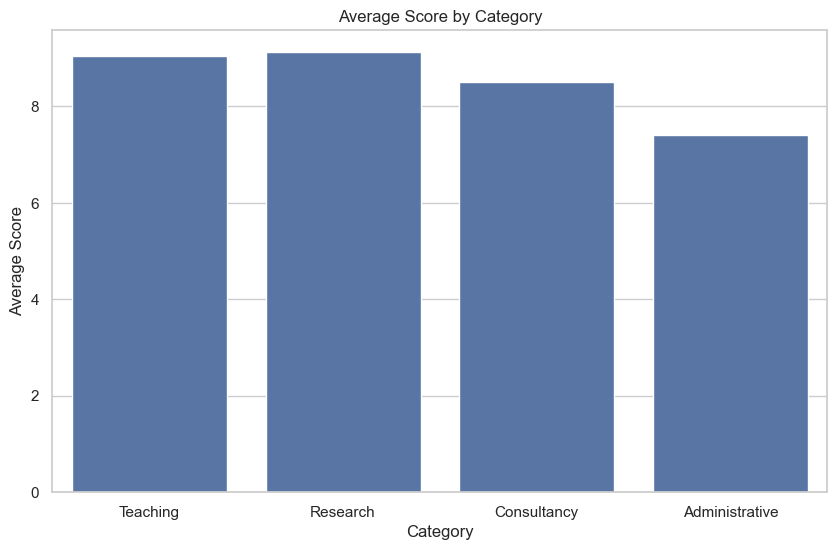

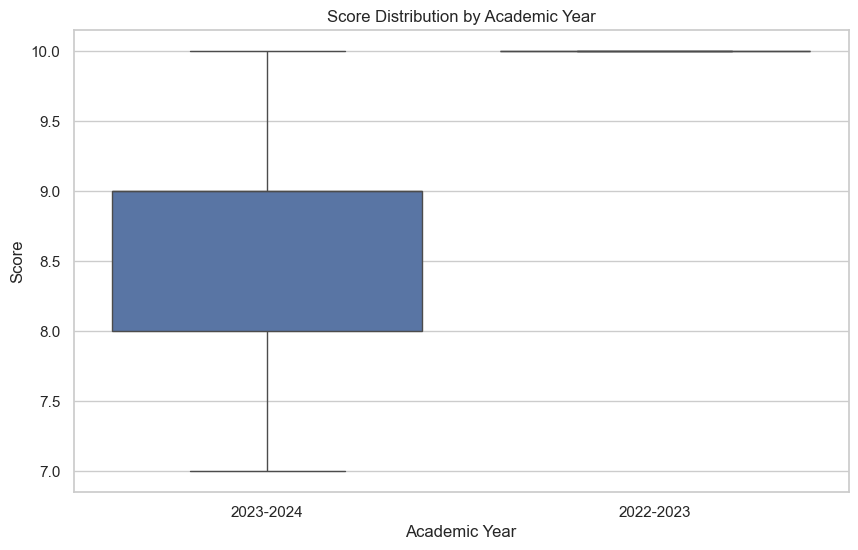

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")

# Distribution of Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Average Score by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Score', data=df, ci=None, estimator='mean')
plt.title('Average Score by Category')
plt.xlabel('Category')
plt.ylabel('Average Score')
plt.show()

# Scores by Academic Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Academic Year', y='Score', data=df)
plt.title('Score Distribution by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Score')
plt.show()


Step 4: Apply Machine Learning Models

1. Clustering (K-Means)

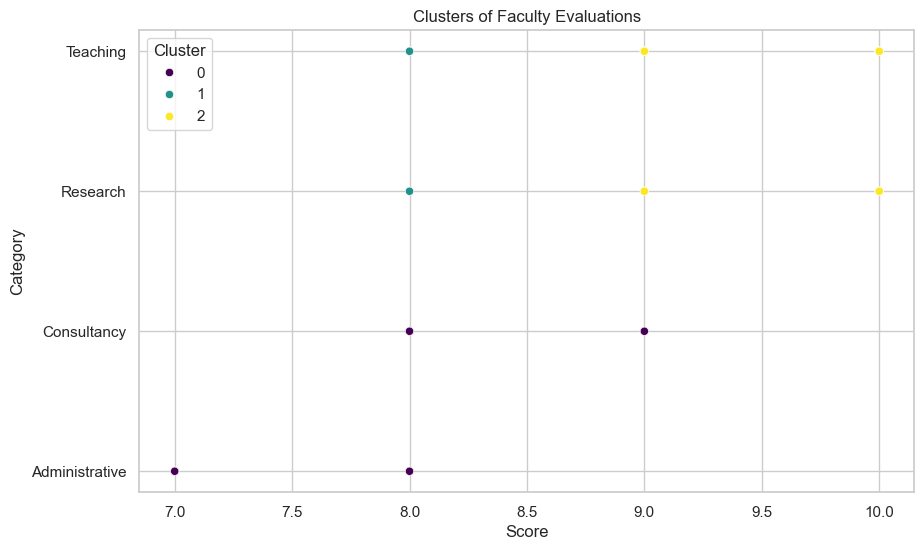

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['Category'] = le.fit_transform(df['Category'])
df_encoded['Academic Year'] = le.fit_transform(df['Academic Year'])

# Select features for clustering
X = df_encoded[['Score', 'Category', 'Academic Year']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Category', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Faculty Evaluations')
plt.xlabel('Score')
plt.ylabel('Category')
plt.show()


2. Regression Analysis

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for regression
X = df_encoded[['Category', 'Academic Year']]
y = df_encoded['Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 0.8497838030707059
Coefficients: [ 0.37438424 -0.99671593]
Intercept: 8.876847290640395
